# MACHINE LEARNING




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('/content/ecom_data_transformed.csv')
data_df

,gender,login_computer,login_mobile,login_phone,payment_cc,payment_cod,payment_cash,payment_credit,payment_debit,payment_ewallet,...,hour_spend,device_registered,satisfaction_score,number_address,complain,order_lastyear,coupon_used,order_count,days_lastorder,cashback_amount
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [ ]:
data_df.dtypes.value_counts()

,count
float64,34


In [ ]:
data_df.isnull().sum().sum()

np.int64(0)

# CORRELACIONES

In [ ]:
corr_matrix = data_df.corr()
corr_churn = corr_matrix['churn']
corr_churn.sort_values(ascending=False)

,churn
churn,1.000000
complain,0.250188
single,0.180847
order_mobile_phone,0.154387
order_phone,0.113364
device_registered,0.107939
satisfaction_score,0.105481
city_tier,0.084703
payment_cod,0.083933
login_phone,0.078916


## MAPA DE CALOR DE CORRELACIONES

<Axes: >

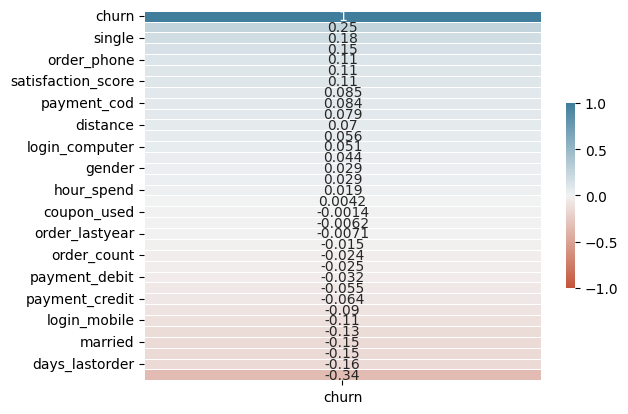

In [ ]:
sns.heatmap(
    data=corr_churn.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## FILTRO POR VARIABLES QUE TENGAN UN CORRELACIÓN MAYOR A 0 Y MENOR A 1 CON CHURN

In [ ]:
corr_filtered = corr_churn[(corr_churn >= 0) & (corr_churn < 1)]
corr_filtered
cols = corr_filtered.index.tolist()
cols

['gender',
 'login_computer',
 'login_phone',
 'payment_cc',
 'payment_cod',
 'payment_ewallet',
 'payment_upi',
 'single',
 'order_phone',
 'order_mobile_phone',
 'city_tier',
 'distance',
 'hour_spend',
 'device_registered',
 'satisfaction_score',
 'number_address',
 'complain']

/tmp/ipython-input-14-1571313160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette="viridis")


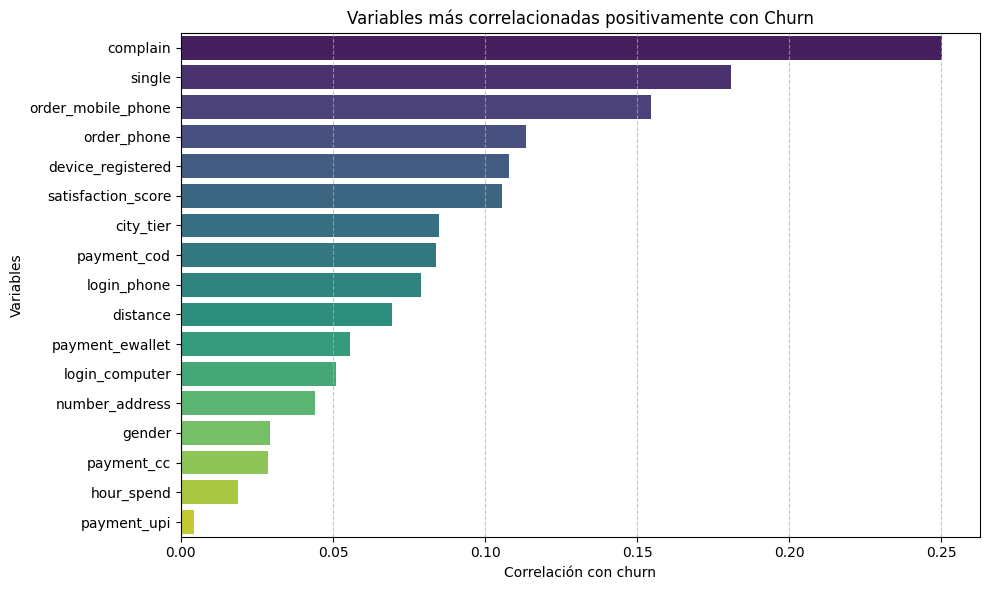

In [ ]:
corr_sorted = corr_filtered.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette="viridis")
plt.title('Variables más correlacionadas positivamente con Churn')
plt.xlabel('Correlación con churn')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## CREACIÓN DE MODELOS DE MACHINE LEARNING

In [ ]:
X = data_df[cols].values
y = data_df['churn'].values

# ENTRENAMIENTO DE MODELO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## REGRESIÓN LOGISTICA

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# CREACION DE MODELO CON PARAMETROS Y MOSTRAR ACCURACY

In [ ]:
model = LogisticRegression()# COLOCAR LOS PARAMETROS QUE CREAN CONVENIENTES
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')

Accuracy : 0.86


#  MATRIZ DE CONFUSIÓN

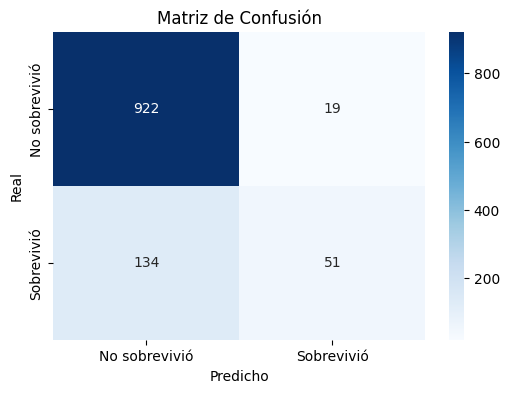

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## ARBOLES DE DECISIÓN

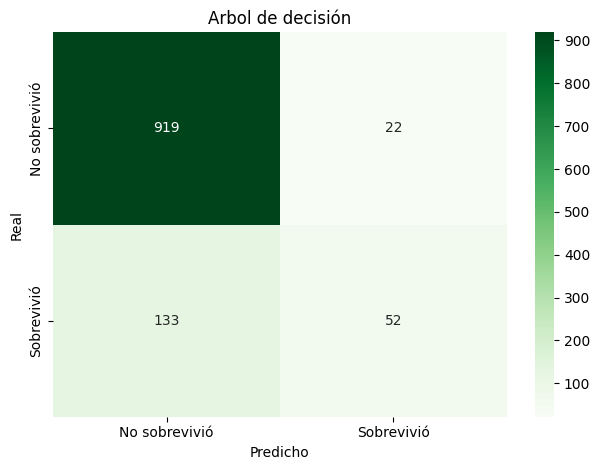

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=40)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens',
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Arbol de decisión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

## RANDOM FOREST

<function matplotlib.pyplot.show(close=None, block=None)>

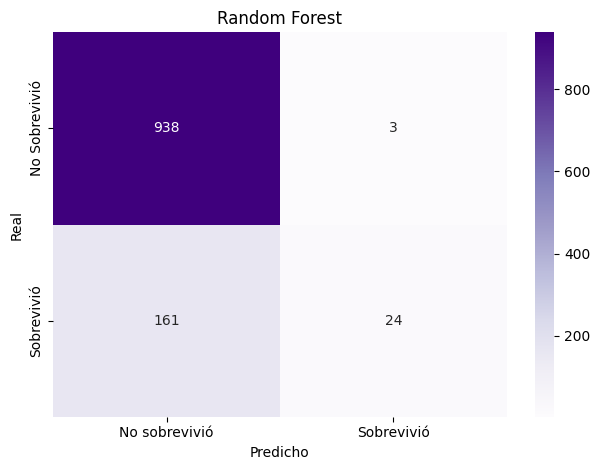

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show